#Proyecto de Data Science - Manuel Muñoz
## Analisis de venta de vehículos en USA:

En este estudio, se analizan datos históricos de ventas de vehículos usados en Estados Unidos con el propósito de entender los factores que influyen en sus precios de venta. Se dispone de un dataset completo con registros detallados de múltiples transacciones, lo que nos brinda una oportunidad valiosa para extraer insights significativos y realizar proyecciones pertinentes.

El dataset cuenta con una amplia gama de características asociadas a cada venta, que van desde la marca, modelo y año de fabricación hasta el kilometraje y el color del vehículo. Estas características serán detalladamente exploradas y analizadas para determinar su impacto en los precios de venta.

El objetivo principal de este análisis es identificar y comprender las relaciones y patrones existentes entre las diversas características de los vehículos y sus precios de venta. Utilizaremos técnicas estadísticas y de visualización de datos para descubrir insights valiosos que puedan ser beneficiosos tanto para compradores como para vendedores en el mercado automotriz.

Además, este estudio permitirá desarrollar un modelo predictivo que, dados ciertos atributos del vehículo como marca, kilometraje y estado, pueda estimar con precisión el precio de venta de un vehículo que no se encuentre en nuestro dataset.

Para alcanzar este objetivo, aplicaremos modelos de regresión lineal con múltiples variables, aprovechando la rica variedad de datos disponibles en nuestro dataset para obtener predicciones confiables y precisas.

---


## Hipótesis nula (H0):

No existe una relación significativa entre las características del vehículo (marca, modelo, año de fabricación, kilometraje, etc.) y su precio de venta en el mercado de vehículos usados en Estados Unidos.

Esta hipótesis establece que las características individuales del vehículo no tienen un impacto directo o significativo en su precio de venta. Durante el análisis, el objetivo será evaluar y, eventualmente, rechazar esta hipótesis utilizando técnicas estadísticas y modelos de regresión para determinar qué variables tienen un efecto significativo en el precio de venta.

### *Importacion de librerías y dataset*:

In [69]:
import numpy as np
import pandas as pd

#Visualizacion
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# preprocesamiento
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# algoritmos
from sklearn.linear_model import LinearRegression # , Ridge , Lasso, RidgeCV
from sklearn.neighbors import KNeighborsRegressor as KNN
from xgboost import XGBRegressor

In [70]:
URL = 'https://raw.githubusercontent.com/ManuelMunoz7/DataScience---Coder/main/car_prices_parcial.csv'

df = pd.read_csv(URL)

## *Análisis exploratorio de los datos:*

In [71]:
df.shape

(149999, 16)

*Muestra del dataset:*

In [72]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


*Muestra de los primeros 3 valores de la tabla:*

- Year: Año de fabricación del vehículo (por ejemplo, 2015)
- Make: Marca o fabricante del vehículo (por ejemplo, Kia, BMW, Volvo)
- Model: Modelo específico del vehículo (por ejemplo, Sorento, Serie 3, S60, serie 6 Gran Coupé)
- Trim: Designación adicional para una versión o paquete de opciones particular del modelo (por ejemplo, LX, 328i SULEV, T5, 650i)
- Body: Tipo de carrocería del vehículo (por ejemplo, SUV, Sedán)
- Transmission: Tipo de transmisión en el vehículo (por ejemplo, automática)
- VIN: Número de Identificación del Vehículo, un código único utilizado para identificar vehículos individuales
- State: Estado en el que se encuentra o está registrado el vehículo (por ejemplo, CA para California)
- Condition: Representación numérica de la condición del vehículo (por ejemplo, 5.0)
- Odometer: Millaje o distancia recorrida por el vehículo
- Color: Color exterior del vehículo
- Interior: Color interior del vehículo
- Seller: Entidad o empresa que vende el vehículo (por ejemplo, Kia Motors America Inc, Financial Services Remarketing)
- MMR: Manheim Market Report, una herramienta de precios utilizada en la industria automotriz norteamericana. Es el equivalente a Acara, en Argentina. Se usa para tener precios de referencia del mercado de los automóviles.
- Selling Price: Precio al que se vendió el vehículo
- Sale Date: Fecha y hora en que se vendió el vehículo

### Variables:

*   Categoricas: Make, Model, trim, body, transmission, state, color, interior, seller,
*   Numéricas: Año, condition (flotante), odometro, mmr, sellingprice.
*   Fecha: Saledate








In [73]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,149999.000000,138207.000000,149922.000000,149999.000000,149999.000000
mean,2009.470816,29.825450,73130.641093,12926.552010,12646.444810
std,4.182271,13.757659,56617.981749,9480.305488,9526.933281
min,1984.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,22.000000,28877.250000,5850.000000,5500.000000
50%,2011.000000,34.000000,58006.000000,11650.000000,11300.000000
75%,2013.000000,41.000000,107773.250000,17450.000000,17300.000000
max,2015.000000,49.000000,999999.000000,176000.000000,169500.000000


## *Análisis de valores nulos:*

In [74]:
print(df.isnull().sum())

year                0
make             1141
model            1169
trim             1470
body             4014
transmission    17586
vin                 0
state               0
condition       11792
odometer           77
color             257
interior          257
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64


In [75]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

year             0.000000
make             0.760672
model            0.779339
trim             0.980007
body             2.676018
transmission    11.724078
vin              0.000000
state            0.000000
condition        7.861386
odometer         0.051334
color            0.171334
interior         0.171334
seller           0.000000
mmr              0.000000
sellingprice     0.000000
saledate         0.000000
dtype: float64

- Considerando que los valores nulos tienen muy poca incidencia sobre el total de los datos, se decide eliminar las filas completas que no contengan estos datos.

- En cuanto a los que tienen nulos de la Transmisión, que es un valor significativo(11%), también se proceden a eliminar. Al ser una variable categórica de 2 opciones, no podemos reemplazarlo por la moda, porque modificaria completamente el análisis. La transmisión puede ser manual o automatica y llevar los valores restantes a uno de esos 2 valores, modificaria el analisis.

- Se procede a eliminar la columna "VIN", por ser un codigo unico identificatorio. Este tipo de datos no permiten el correcto funcionamiento del modelo posteriormente utilizado.


In [76]:
#Eliminación y chequeo de nulos.
df = df.dropna()
print("Número de filas después de eliminar valores nulos:", len(df))
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

Número de filas después de eliminar valores nulos: 119409


year            0.0
make            0.0
model           0.0
trim            0.0
body            0.0
transmission    0.0
vin             0.0
state           0.0
condition       0.0
odometer        0.0
color           0.0
interior        0.0
seller          0.0
mmr             0.0
sellingprice    0.0
saledate        0.0
dtype: float64

In [77]:
# elimino el vin, codigo unico de identifiaccion - ID
df.drop('vin',axis=1,inplace=True)

## Análisis de columnas:

In [78]:
df.make.value_counts()
#No hay valores repetidos.

make
Ford             19901
Chevrolet        13225
Nissan           10170
Toyota            8314
Honda             7241
Dodge             6887
BMW               4953
Hyundai           4694
Kia               4072
Chrysler          3904
Mercedes-Benz     3735
Infiniti          3675
Jeep              3165
Volkswagen        2730
Lexus             2547
GMC               2119
Mazda             1924
Cadillac          1727
Subaru            1379
Acura             1349
Audi              1312
Lincoln           1235
Pontiac           1103
Buick             1087
Mitsubishi         941
Ram                904
Volvo              821
MINI               722
Saturn             694
Mercury            448
Scion              404
Jaguar             369
Land Rover         366
Porsche            292
Suzuki             245
FIAT               185
HUMMER             176
Saab               139
Oldsmobile          82
smart               56
Isuzu               43
Bentley             31
Maserati            24
Ferrar

In [79]:
df['make'].nunique()

50

In [80]:
print('Cantidad por segmento:', df.model.value_counts())

Cantidad por segmento: model
Altima                 3884
F-150                  2733
Fusion                 2652
Accord                 2595
Escape                 2550
                       ... 
Mark VIII                 1
M4                        1
Eighty-Eight Royale       1
Phaeton                   1
Rapide                    1
Name: count, Length: 696, dtype: int64


In [81]:
print('Cantidad por segmento:', df.trim.value_counts())

Cantidad por segmento: trim
Base                    12676
SE                       9697
LX                       5223
Limited                  3895
LT                       3619
                        ...  
Sport GT S Automatic        1
3.0 R Limited               1
3.0 R VDC Limited           1
Z85 SL                      1
sDrive30i                   1
Name: count, Length: 1262, dtype: int64


In [82]:
print('Cantidad de unicos:', df['trim'].nunique())

Cantidad de unicos: 1262


## Análisis de OUTLIERS:

### *1) Registros con precios de venta inferior a los 100 dólares. Son considerados outliers. Subastas o condiciones comerciales especiales que no serán tenidas en cuenta.*
Durante el análisis descriptivo de los datos, se evidenciaron ventas de 1 dólar. Lo que se considera fuera del análisis, por situaciones espciales de venta y/o errores de tipeo.

In [83]:
filas_a_eliminar = (df['sellingprice'] < 100).sum()
print("Número de filas eliminadas:", filas_a_eliminar)
# Eliminar las filas con PV inferior a 100 dólares. Dentro del análisis de minimos, se evidencia que hay ventas registradas x 1 dólar, por ejemplo.
df = df[df['sellingprice'] >= 100]

Número de filas eliminadas: 1


### 2) *Evaluación de outliers con gráfico boxplot / caja y bigote.*

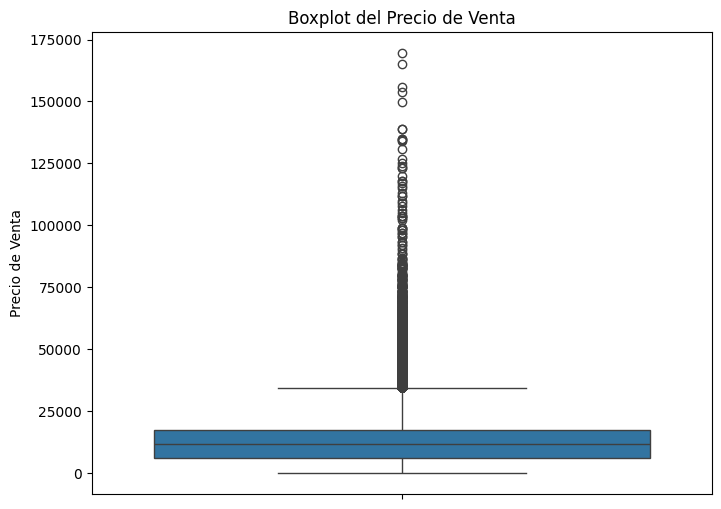

In [84]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['sellingprice'])
plt.title('Boxplot del Precio de Venta')
plt.ylabel('Precio de Venta')
plt.show()

- En su mayoría, hay valores que se encuentran por encima del bigote, por lo se comienza el tratamiento de los datos.
- No se evidencias datos inferiores, por ser eliminados previamente (solo 2 operaciones de venta)

### Manejo de outliers:

In [85]:
# manejo de outliers
def outliers(data,feature):
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1


    lower_limit = q1 - iqr *1.5
    upper_limit = 150000
    #IMPORTANTE: Tiene menos error el modelo si fijo el valor en U$D 150.000. Se desarrolla más adelante.

    ls = data.index[(data[feature]<lower_limit) | (data[feature]>upper_limit)]

    return ls

def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [86]:
# obtención de outliers
index_list = []
index_list.extend(outliers(df,'sellingprice'))

index_list
tamaño_outliers = len(index_list)
print('la cantidad de outliers es de:', tamaño_outliers)

la cantidad de outliers es de: 4


- La proporción de outliers es practicamente nula sobre el total de la muestra.
- Como la cantidad total de outliers es muy baja, se procede a eliminarlos.
- Considero que los valores de venta de los vehiculos que son elevados se debe a ser vehiculos de marcas especiales o ediciones especiales, que van a ser tenidos en cuenta. Es por esto, que se fija un tope máximo de 150.000 dólares.
- En el siguiente análisis descriptivo de los datos, se podrá ver que hay determinadas marcas de vehiculos que tienen valores de mercado muy elevados y deben ser tenidos en cuenta en el modelo.

In [87]:
df = remove(df,index_list)
df.shape

(119404, 15)

# Análisis descriptivo de los datos:

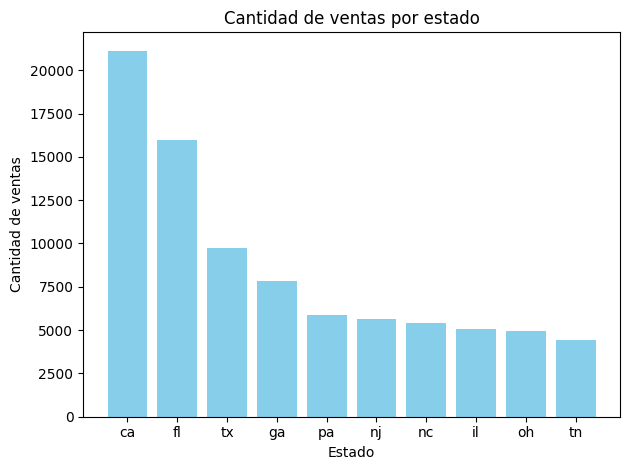

In [88]:
conteo_ventas_por_estado = df['state'].value_counts().head(10)
#Unicamente los principales 10.

#print("Cant de ventas por estado:")
#print(conteo_ventas_por_estado)

fig, ax = plt.subplots()

estados = conteo_ventas_por_estado.index
cantidad_ventas = conteo_ventas_por_estado.values

ax.bar(estados, cantidad_ventas, color='skyblue')

ax.set_title('Cantidad de ventas por estado')
ax.set_xlabel('Estado')
ax.set_ylabel('Cantidad de ventas')

plt.tight_layout()
plt.show()

- Frente a la necesidad de realizar una nueva venta de un vehiculo, se deberia considerar la posibilidad de promocionar la venta en los estados de Florida y California, por el mayor número de ventas.


*Análisis de distribución de precios:*

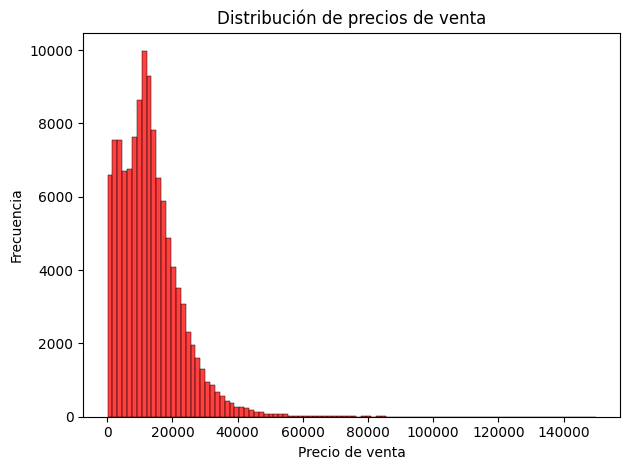

In [89]:
plt.figure()
sns.histplot(df, x='sellingprice', bins=100, color='red')
plt.title('Distribución de precios de venta')
plt.xlabel('Precio de venta')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

- A través de este gráfico, vemos que la mayoría de los valores de venta de los vehiculos ronda en torno a las 15.000/20.000 dólares.

*Distribución de precios x marcas:*

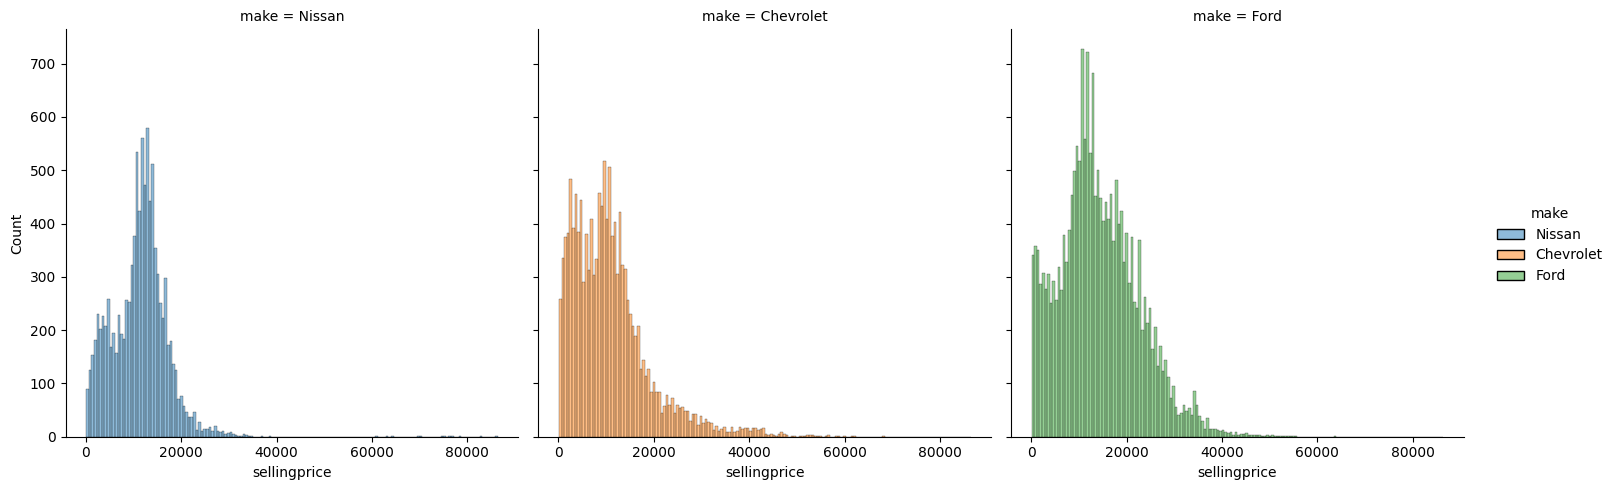

In [90]:
top_3_marcas = df['make'].value_counts().head(3).index
data_top_3 = df[df['make'].isin(top_3_marcas)]
sns.displot(data_top_3, x="sellingprice", hue="make", col="make")

- Considerando las 3 primeras marcas, vemos un diferencia muy importante en la marca Ford, con un valor de reventa mucho más alto.

##*Distribución de ventas por marca, de los principales 10:*

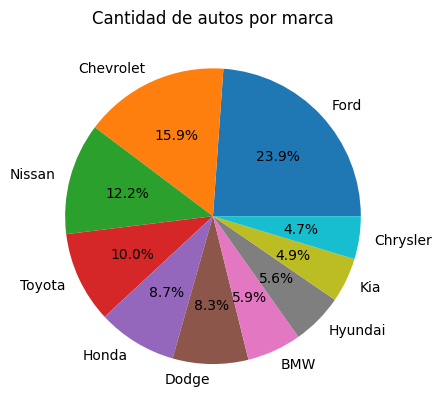

In [91]:
conteo_autos_por_marca = df['make'].value_counts().head(10)

fig, ax = plt.subplots()

ax.pie(conteo_autos_por_marca, labels=conteo_autos_por_marca.index, autopct='%1.1f%%')
ax.set_title('Cantidad de autos por marca')

plt.show()

- Este gráfico nos da una idea del poder de reventa que se tiene x marca.
- En caso de que se quiera comprar un nuevo auto, se podría considerar si el día de mañana tendrá mayor o menor poder de reventa.
- En este caso, se ve que las marcas Ford, Chevrolet, Nissan, Toyota y Dodge, son las principales.

# *Relación entre distintas variables:*

In [92]:
df[['year', 'condition', 'odometer', 'mmr', 'sellingprice']].corr()
#Relación numérica. No garantiza que haya relación lineal.

,year,condition,odometer,mmr,sellingprice
year,1.000000,0.353029,-0.763447,0.611972,0.602371
condition,0.353029,1.000000,-0.321191,0.297713,0.346026
odometer,-0.763447,-0.321191,1.000000,-0.597144,-0.589860
mmr,0.611972,0.297713,-0.597144,1.000000,0.982996
sellingprice,0.602371,0.346026,-0.589860,0.982996,1.000000


In [93]:
#Gráfica para analizar el TIPO de relación entre parámetros más importantes
#sns.pairplot(df,vars=['condition','odometer','mmr','sellingprice'],hue='year')
#plt.show()

## *Relación entre el precio de venta con el kilometraje del vehiculo:*

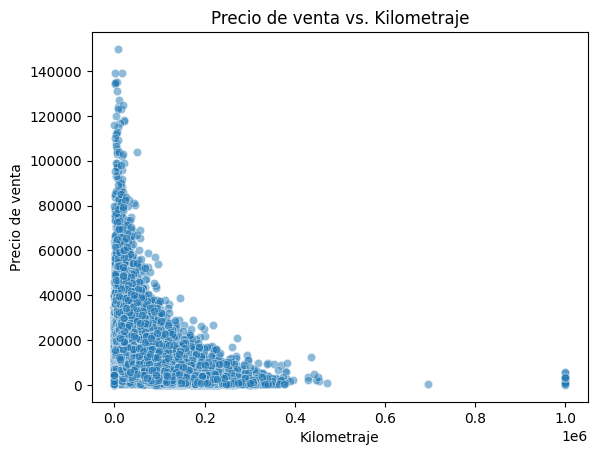

In [94]:
sns.scatterplot (df, x='odometer', y='sellingprice', alpha = 0.5)
plt.title('Precio de venta vs. Kilometraje')
plt.xlabel('Kilometraje')
plt.ylabel('Precio de venta')
plt.show()

- Se puede evidenciar que existe una relación entre ambos parámetros. A mayor número de kilometrajes, menor es el precio de venta del vehiculo.
- Todo esto es independiente de los demás parámetros.

## *Relación entre variables MMR vs Selling Price:*

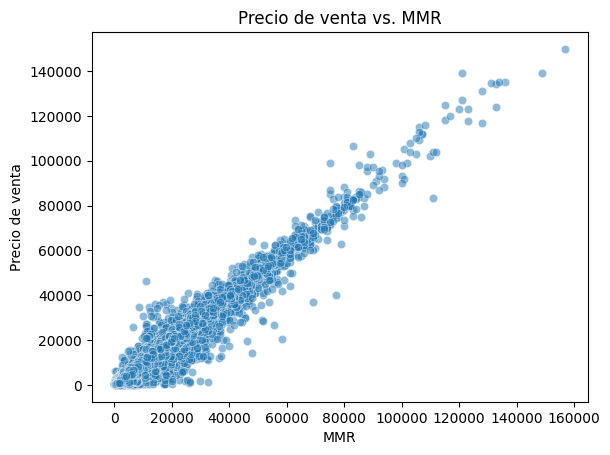

In [95]:
sns.scatterplot (df, x='mmr', y='sellingprice', alpha = 0.5)
plt.title('Precio de venta vs. MMR')
plt.xlabel('MMR')
plt.ylabel('Precio de venta')
plt.show()

- Podemos evidenciar una clara relación lineal entre las variables.
- Es importante destacar que mientras más bajo sea el MMR, mayor posibilidad de error tendrá el modelo, debido a la variabilidad de los datos con MMR inferior a los 40.000


## *Relación entre variables "Condition" y "Selling Price":*

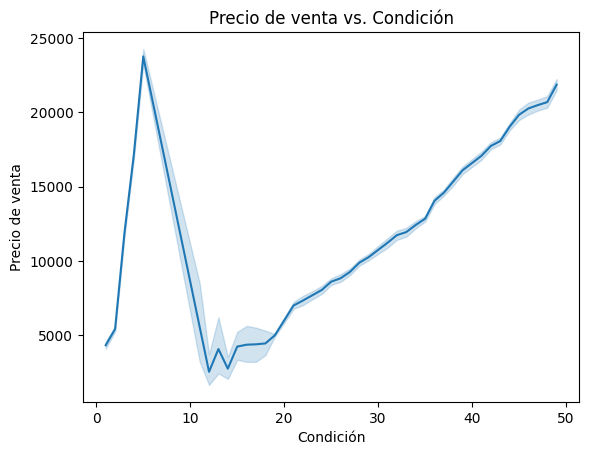

In [96]:
sns.lineplot(data=df, x='condition', y='sellingprice')
plt.title('Precio de venta vs. Condición')
plt.xlabel('Condición')
plt.ylabel('Precio de venta')
plt.show()

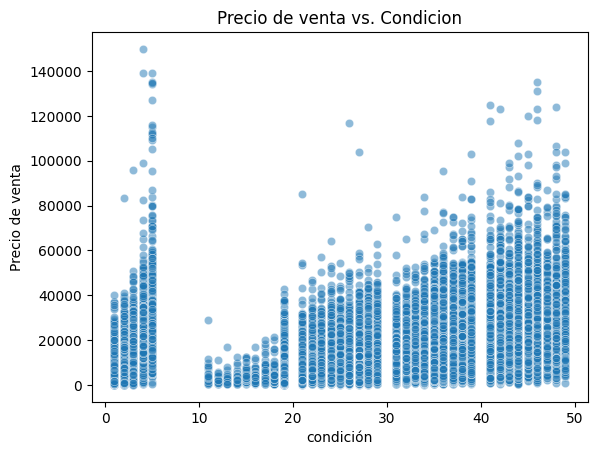

In [97]:
sns.scatterplot (df, x='condition', y='sellingprice', alpha = 0.5)
plt.title('Precio de venta vs. Condicion')
plt.xlabel('condición')
plt.ylabel('Precio de venta')
plt.show()

- Gracias al segundo gráfico de la misma relación, podemos ver que hay un claro error en el concepto, en donde se puntuó con distintos criterios. Algunos puntuaron del 1-5 y otros del 10-50.
- Producto de esto, realizamos un mnodificacion de las puntuaciones para que se ajusten mejor al modelo. Pasando las valuaciones del 10-50 a una de 1-5.

In [98]:
df['condition'].dtype

dtype('float64')

In [99]:
valores_unicos = df['condition'].unique()
valores_unicos

array([ 5., 45., 41., 43.,  1., 34.,  2., 42.,  3., 48., 49., 17., 19.,
       29., 38., 44., 47., 32.,  4., 25., 37., 39., 31., 28., 46., 35.,
       26., 21., 36., 22., 27., 24., 33., 23., 16., 18., 12., 14., 11.,
       13., 15.])

In [100]:
df.loc[df['condition'] > 10, 'condition'] = ((df['condition'] / 10))

valores_unicos_actualizados = df['condition'].unique()

print("Valores únicos después de la conversión:", valores_unicos_actualizados)

Valores únicos después de la conversión: [5.  4.5 4.1 4.3 1.  3.4 2.  4.2 3.  4.8 4.9 1.7 1.9 2.9 3.8 4.4 4.7 3.2
 4.  2.5 3.7 3.9 3.1 2.8 4.6 3.5 2.6 2.1 3.6 2.2 2.7 2.4 3.3 2.3 1.6 1.8
 1.2 1.4 1.1 1.3 1.5]


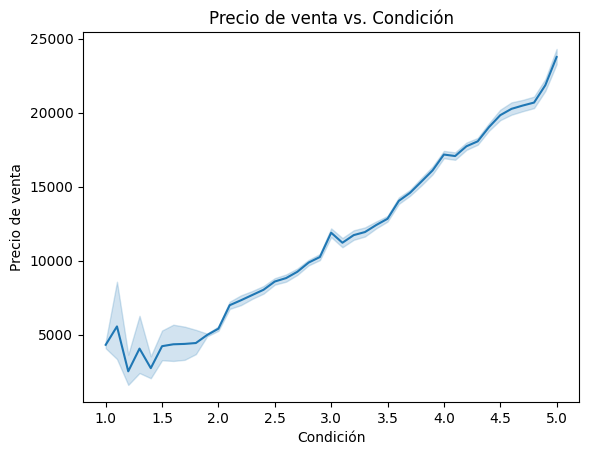

In [101]:
sns.lineplot(data=df, x='condition', y='sellingprice')
plt.title('Precio de venta vs. Condición')
plt.xlabel('Condición')
plt.ylabel('Precio de venta')
plt.show()

- Con este nuevo gráfico podemos nuevamente, una clara relacion lineal positiva entre la condicion y el precio de venta. Es decir, que frente a un mejor estado del vehiculo, mayor será su precio.

## *Avance temporal de la transmisión utilizada:*

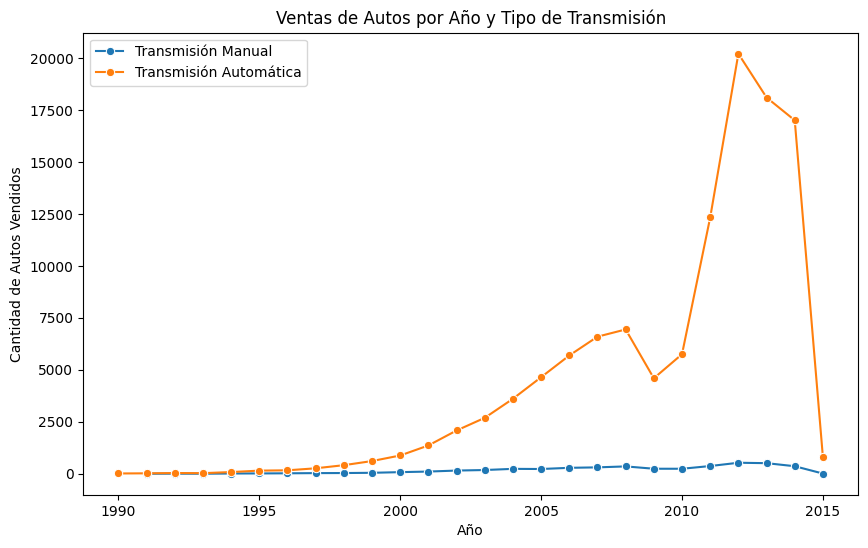

In [102]:
df_manual = df[df['transmission'] == 'manual']
df_automatica = df[df['transmission'] == 'automatic']

cuenta_manual = df_manual.groupby('year').size()
cuenta_automatica = df_automatica.groupby('year').size()

plt.figure(figsize=(10, 6))
sns.lineplot(data=cuenta_manual, marker='o', label='Transmisión Manual')
sns.lineplot(data=cuenta_automatica, marker='o', label='Transmisión Automática')

plt.title('Ventas de Autos por Año y Tipo de Transmisión')
plt.xlabel('Año')
plt.ylabel('Cantidad de Autos Vendidos')

plt.show()

In [103]:
print('Cantidad por segmento:', df.transmission.value_counts())

Cantidad por segmento: transmission
automatic    115059
manual         4345
Name: count, dtype: int64


- Principalmente vemos que hay una clara diferencia entre la cantidad de ventas de autos con trnsmisión automática por sobre la manual.
- Tambien vemos un crecimiento importante en los ultimos autos, por lo que frente a una nueva operación, se debería optar por un vehiculo de transmisión automática, para obtener un mayor poder de reventa.

# *Análisis de datos:*

### Precios promedios por marca.

In [104]:
# Calcular el precio promedio de venta por marca. No lo considero como indice.
precio_promedio_por_marca = df.groupby(by="make", as_index=False)["sellingprice"].mean()

# Ordenar el DF por precio promedio de venta de más caro a más barato.
precio_promedio_por_marca.sort_values(by="sellingprice", ascending=False, inplace=True)

# Seleccionar las primeras 10 marcas más caras, en promedio
primeras_10_marcas_caras = precio_promedio_por_marca.head(10)
primeras_10_marcas_caras

,make,sellingprice
39,Rolls-Royce,149800.000000
11,Ferrari,120500.000000
45,Tesla,80750.000000
4,Bentley,66877.419355
1,Aston Martin,65666.666667
12,Fisker,54500.000000
28,Maserati,39979.166667
37,Porsche,34421.917808
24,Land Rover,34111.420765
38,Ram,24725.310841


- Se evidencia que hay marcas con precios promedios muy elevados, lo cual justifica el porque hay valores que se ven como "potenciales ouliers" en el gráfico boxplot. Es por esto, que considero que fue acertada la decision de mantenerlos en el modelo.

## Análisis de antiguedad de los vehiculos a la hora de la venta:

In [105]:
#Cambio el formato de "year" a fecha
tipo_de_dato = df['year'].dtype
print("Tipo de datos de la columna year:", tipo_de_dato)

#Cambio el formato de "Saledate" a fecha + hora.
df['saledate'] = pd.to_datetime(df['saledate'], utc=True)
tipo_de_dato = df['saledate'].dtype
print("Tipo de datos de la columna saledate:", tipo_de_dato)

Tipo de datos de la columna year: int64


<ipython-input-105-f058eee4fc28>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['saledate'] = pd.to_datetime(df['saledate'], utc=True)


Tipo de datos de la columna saledate: datetime64[ns, UTC]


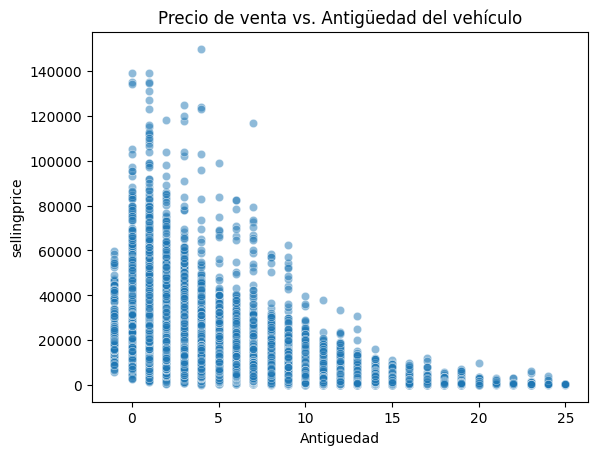

In [106]:
df['Antiguedad'] = df['saledate'].dt.year - df['year']
df.Antiguedad.value_counts()

sns.scatterplot (df, x='Antiguedad', y='sellingprice', alpha = 0.5)
plt.title('Precio de venta vs. Antigüedad del vehículo')
plt.show()

In [107]:
# Filtrar los datos para eliminar vehículos con antigüedad negativa, porque sifnica que los valores no son fiables.
df = df[df['Antiguedad'] >= 0]

# Verificar la cantidad de datos restantes después de la eliminación
print("Número de filas después de filtrar:", len(df))


Número de filas después de filtrar: 119247


- En primera instancia, se eliminan los vehiculos que se vendieron previo a su fabricación por ser un dato inconsistente. (Antiguedad<1)
- En segunda instancia, vemos nuevamente una relación entre la antiguedad del veh9iculo y el precio de venta. A mayor antiguedad, menor precio de venta. Linealidad negativa.

## Conversión de datos categóricos a numéricos:


In [108]:
# Transformar las variables categóricas a números, para poder usar el modelo de regresión.

column=['make','model','trim','body','transmission','state','color', 'interior', 'seller']

df[column] = df[column].apply(LabelEncoder().fit_transform)

In [109]:
df.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,Antiguedad
2,2014,3,6,214,36,0,1,4.5,1331.0,7,1,1996,31900,30000,2015-01-14 20:30:00+00:00,1
3,2015,48,520,1026,36,0,1,4.1,14282.0,17,1,5624,27500,27750,2015-01-28 20:30:00+00:00,0
4,2014,3,23,282,36,0,1,4.3,2641.0,7,1,1996,66000,67000,2014-12-18 04:30:00+00:00,0
6,2014,3,366,326,36,0,1,3.4,14943.0,1,1,5188,69000,65000,2014-12-17 04:30:00+00:00,0
7,2014,7,162,41,36,0,1,2.0,28617.0,1,1,1845,11900,9800,2014-12-16 05:00:00+00:00,0


In [110]:
df['saledate'] = pd.to_datetime(df['saledate'])

# Extraer el año y el mes de la fecha y almacenarlos en nuevas columnas
df['año'] = df['saledate'].dt.year
df['mes'] = df['saledate'].dt.month

In [111]:
df.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,Antiguedad,año,mes
2,2014,3,6,214,36,0,1,4.5,1331.0,7,1,1996,31900,30000,2015-01-14 20:30:00+00:00,1,2015,1
3,2015,48,520,1026,36,0,1,4.1,14282.0,17,1,5624,27500,27750,2015-01-28 20:30:00+00:00,0,2015,1
4,2014,3,23,282,36,0,1,4.3,2641.0,7,1,1996,66000,67000,2014-12-18 04:30:00+00:00,0,2014,12
6,2014,3,366,326,36,0,1,3.4,14943.0,1,1,5188,69000,65000,2014-12-17 04:30:00+00:00,0,2014,12
7,2014,7,162,41,36,0,1,2.0,28617.0,1,1,1845,11900,9800,2014-12-16 05:00:00+00:00,0,2014,12


In [112]:
df.drop('saledate',axis=1,inplace=True)
df.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,Antiguedad,año,mes
2,2014,3,6,214,36,0,1,4.5,1331.0,7,1,1996,31900,30000,1,2015,1
3,2015,48,520,1026,36,0,1,4.1,14282.0,17,1,5624,27500,27750,0,2015,1
4,2014,3,23,282,36,0,1,4.3,2641.0,7,1,1996,66000,67000,0,2014,12
6,2014,3,366,326,36,0,1,3.4,14943.0,1,1,5188,69000,65000,0,2014,12
7,2014,7,162,41,36,0,1,2.0,28617.0,1,1,1845,11900,9800,0,2014,12


##Modelado:

In [113]:
# seleccionar variables
X = df.drop(['sellingprice'],axis=1)
y = df['sellingprice']

X.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,Antiguedad,año,mes
2,2014,3,6,214,36,0,1,4.5,1331.0,7,1,1996,31900,1,2015,1
3,2015,48,520,1026,36,0,1,4.1,14282.0,17,1,5624,27500,0,2015,1
4,2014,3,23,282,36,0,1,4.3,2641.0,7,1,1996,66000,0,2014,12
6,2014,3,366,326,36,0,1,3.4,14943.0,1,1,5188,69000,0,2014,12
7,2014,7,162,41,36,0,1,2.0,28617.0,1,1,1845,11900,0,2014,12


In [114]:
# split data 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=16)

print('x_train size',X_train.shape)
print('y_train size',y_train.shape)
print('x_test size',X_test.shape)
print('y_test size',y_test.shape)

x_train size (83472, 16)
y_train size (83472,)
x_test size (35775, 16)
y_test size (35775,)


## Aplico regresión lineal:


In [115]:
model = LinearRegression()

In [116]:
# entrenamos
model.fit(X_train, y_train)

LinearRegression()

In [117]:
# prediccion
y_pred = model.predict(X_test)

In [118]:
# metrica R2
r2_rl = r2_score(y_test, y_pred)
r2_rl

0.973422777239459

## KNN:

In [119]:
# instanciamos el modelo
model = KNN(n_neighbors=3,weights="uniform",metric="euclidean")

In [120]:
# entrenamos
model.fit(X_train, y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=3)

In [121]:
# prediccion
y_pred = model.predict(X_test)

In [122]:
# metrica R2
r2_knn = r2_score(y_test, y_pred)
r2_knn

0.9580364463741329

## XGBoost

In [123]:
# instanciamos el modelo
model = XGBRegressor(n_estimators= 2000 , max_depth= 7 , learning_rate = 0.01)

In [124]:
# entrenamos
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [125]:
# prediccion
y_pred = model.predict(X_test)

In [126]:
# metrica R2
r2_xgb = r2_score(y_test, y_pred)
r2_xgb

0.9718765749414112

#Resultados Finales:

In [127]:
print("Algoritmo Regresión Lineal " + str(round(r2_rl, 3)))
print("Algoritmo KNN " + str(round(r2_knn, 3)))
print("Algoritmo XGB " + str(round(r2_xgb, 3)))

Algoritmo Regresión Lineal 0.973
Algoritmo KNN 0.958
Algoritmo XGB 0.972


# Considerando que el algoritmo que mayor R2 (bonda de ajuste) tiene es el  Algoritmo Regresión Lineal, con un valor de 0.973, seleccionariamos el mismo para poder llevarlo a producción y de esta manera predecir valores futuros de Precio de venta (variable Y)
